# Antes de começar a prática:

Instalação do Python: https://www.continuum.io/downloads

Arquivos que serão usados: https://www.dropbox.com/s/2361i4sa3valu62/pratica-2016.tar.gz?dl=0

# Abrindo e plotando um arquivo FITS

Uma das principais atividades cotidianas de um astrofísico é lidar com imagens e espectros que são em sua grande maioria arquivos no formato FITS. Em Python que hoje em dia é a principal ferramenta computacional usada, temos dois módulos que contem boa parte das funções computacionais que um astrofísico pode querer. Talvez o mais importante módulo é o AstroPy: http://docs.astropy.org/en/stable/io/fits/index.html. Este módulo centraliza boa parte do desenvolvimento de ferramentas computacionais específicas para astrofísica. Dentre elas rotinas para manipulação de arquivos no formato FITS que usaremos nesta pratica.

Veja abaixo um exemplo de como se abre um arquivo FITS com uma imagem:

Filename: Ha_2008.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     179   (1389, 1383)   float32   


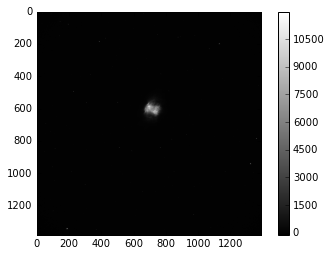

In [5]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

# função para plotar graficos dentro do notebook
%matplotlib inline


# para obter informação sobre como lidar com imagem fits usando python e astropy
#          http://docs.astropy.org/en/stable/io/fits/index.html

# para ver diversos tutoriais relativos ao uso de AstroPy em astrofísica veja:
#          http://www.astropy.org/astropy-tutorials/

# le o arquivo fits com os dados e coloca-o em uma unidade logica chamada 'hdul'
file = 'Ha_2008.fits'

hdul = fits.open(file)

# imporime informações sobre o arquivo FITS aberto
hdul.info()

plt.imshow(hdul[0].data, cmap='gray')
plt.colorbar()
plt.show()

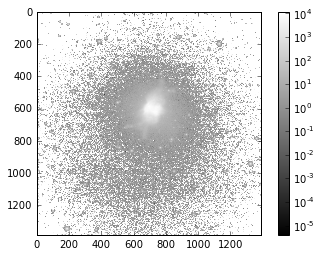

('Min:', -115.59237)
('Max:', 11991.837)
('Mean:', 19.54458)
('Stdev:', 312.453)


In [12]:
# mostrar a mesma imagem mas com escala logaritmica

from matplotlib.colors import LogNorm

plt.imshow(hdul[0].data, cmap='gray', norm=LogNorm())
plt.colorbar()
plt.show()

# imprime dados sobre a imagem:
print('Min:', np.min(hdul[0].data))
print('Max:', np.max(hdul[0].data))
print('Mean:', np.mean(hdul[0].data))
print('Stdev:', np.std(hdul[0].data))

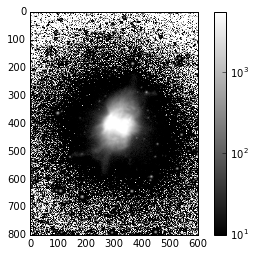

In [26]:
# mostrar uma parte da imagem mas com escala logaritmica

from matplotlib.colors import LogNorm

plt.imshow(hdul[0].data[200:1000,400:1000], cmap='gray', norm=LogNorm(), clim=(10, 5500.0))
plt.colorbar()
plt.show()

# notem a ordem dos eixos [eixo y, eixo x]

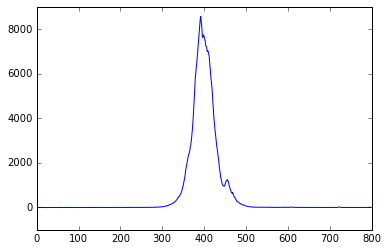

In [30]:
# fazendo um plot de um corte ao longo da imagem

plt.plot(hdul[0].data[200:1000,700])

# Ajuste de funções

Uma das principais tarefas de um cientista consiste em comparar dados experimentais (ou observacionais no caso da astrofísica) com modelos desenvolvidos por teóricos. Os modelos em geral consistem de equações matemáticas que pretendem prever algum aspecto de um fenomeno. Precisamos então desenvolver ferramentas que nos ajudem a decidir sobre quão bem um modelo explica um dado conjunto de dados experimentais.

Em muitos casos em um conjunto de dados, a incerteza é diferente para diferentes pontos. Nesses casos, nós gostaríamos de ponderar os dados que tem menor incerteza mais fortemente do que aqueles dados que têm maior incerteza. Para este caso existe um método padrão de ponderação apropriado que é conhecido como $\chi^2$ (ou qui-quadrado). Neste método supõe-se que associada a cada ponto $(x_{i},y_{i})$ dos dados há uma incerteza no valor de $Y_{i}$ de $\pm \sigma_{i}$. Neste caso, o "melhor ajuste" é definido como o conjunto de parâmetros de ajuste que minimiza a soma:

$\chi^2 = \sum_{i} \left(\frac{y_{i} - f(x_{i})} {\sigma_{i}}\right)^2 $

Veja no link https://pt.wikipedia.org/wiki/Chi-quadrado mais detalhes sobre esse critério.

O método acima para ajuste de funções pode ser usado somente se a função pode ser transformada em uma função linear nos parâmetros de ajuste a, b, c ... Quando temos uma função de ajuste não-linear que não pode ser transformada numa forma linear, aplica-se uma outra abordagem.

O problema de encontrar os valores de parâmetros de ajuste que minimizam $\chi^2$ é um problema de optimização não linear para o qual não existe geralmente nenhuma solução analítica (em contraste com o problema de optimização linear). Podemos ganhar alguns insights sobre este problema de otimização não-linear, ou seja, determinação de uma função não-linear adequada para um conjunto de dados, considerando-se uma função de ajuste com apenas dois parâmetros. Ou seja, estamos tentando ajustar algum conjunto de dados ${x_{i}, y_{i}}$, com incertezas em ${y_{i}}$ de $\sigma_{i}$, usando uma função $f(x, a, b)$ em que a e b são os dois parâmetros de ajuste. Para fazer isso, precisamos achar o mínimo em:

$\chi^2 (a, b) = \sum_{i} \left( \frac{y_{i}-f(x_{i})} {\sigma_{i}} \right)^2 $ ;.

Note-se que uma vez que o conjunto de dados, incertezas, e a função de montagem são especificadas, $\chi^2(a, b)$ é simplesmente uma função de a e b. Podemos imaginar essa função com uma paisagem com picos e vales: como nós variamos a e b, $\chi^2(a, b)$ sobe e desce. A idéia básica de todas as rotinas de ajuste não-linear é começar com algumas estimativas iniciais para os parâmetros de ajuste, aqui a e b, e posteriormente explorar paisagem de $\chi^2(a, b)$, tentando encontrar os valores de a e b que a minimizam.

Há uma série de métodos diferentes para tentar encontrar o mínimo em $\chi^2(a, b)$ para problemas de ajuste não-linear. No entanto, o método que é mais amplamente utilizado chama-se método de Levenberg-Marquardt. Na verdade, o método de Levenberg-Marquardt é uma combinação de dois outros métodos, o método de busca de gradientes (ou inclinação) e extrapolação parabólica. Grosso modo, quando os valores de a e b não estão muito perto dos seus valores ideais, o método de gradiente descendente, determina em que direcção no espaço (a, b) a função $\chi^2(a, b)$ diminui mais rapidamente, direção de descida mais íngreme e, em seguida, muda a e b para se mover nessa direção. Este método é muito eficiente, a menos que a e b sejam muito próximos dos seus valores ótimos. Perto os valores ótimos de a e b, a extrapolação parabólica é mais eficiente. Portanto, o método de Levenberg-Marquardt altera-se gradualmente para o método de extrapolação parabólico, que aproxima o $\chi^2(a, b)$ por uma série de Taylor de segunda ordem em a e b e, em seguida, calcula diretamente o valor analítico do mínimo da série de aproximação. Este método só é bom se a série de Taylor de segunda ordem fornece uma boa aproximação do $\chi^2(a, b)$. É por isso que a extrapolação só funciona bem muito próxima do mínimo em $\chi^2(a, b)$.

Fazemos uma importante observação cautelar: o método de Levenberg-Marquardt pode falhar se as estimativas iniciais dos parâmetros de ajuste estão muito longe da solução desejada. Este problema torna-se mais grave quanto maior for o número de parâmetros de ajuste. Assim, é importante para fornecer estimativas iniciais razoáveis para os parâmetros de ajuste. Normalmente, este não é um problema, como é evidente a partir da situação física de uma experiência particular que os valores razoáveis dos parâmetros de ajuste são. Mas cuidado!

O módulo scipy.optimize (manual e documentação aqui: http://docs.scipy.org/doc/scipy/reference/optimize.html) fornece rotinas que implementam o método de ajuste não-linear de Levenberg-Marquardt. Um é chamado scipy.optimize.leastsq. Uma versão um pouco mais fácil de usar do mesmo método é acessado através de uma outra rotina no mesmo módulo scipy.optimize: ele é chamado scipy.optimize.curve_fit e é aquele que mostraremos aqui.

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt

#definindo a função ou modelo a ser ajustado
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

#simulando um conjunto de dados
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
ydata = y + 0.2 * np.random.normal(size=len(xdata))

#fazendo o ajuste
popt, pcov = curve_fit(func, xdata, ydata)

plt.plot(xdata, ydata,'ro')
plt.plot(xdata, func(xdata,popt[0],popt[1],popt[2]))
plt.title('Um ajuste simples')
plt.show()

# Nosso objetivo

1 - Nesta prática vamos tentar obter parametros físicos ara uma nebulosa planetária a partir de seu espectro. Pra tanto, precisamos adaptar os programas acima para executar as seguintes tarefas:

a) ler o arquivo fits com o espectro observado da nebulosa;

b) plotar o espectro nas regiões das linhas que vamos utilizar;
    dica: npix = float(hdul[0].header['NAXIS1']) # usado para pegar dados do header da imagem

c) criar funções que definem perfis gaussianos a serem ajustados;

d) ajustar as gaussianas as linhas obtendo seu fluxo para assim realizar  os calculos necessários;

e) calcular a temperatura e densidade da nebulosa

mãos a obra!

